In [2]:
import tensorflow as tf

tf.__version__

'1.14.0'

In [23]:
# Mnits datasets
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits from 0-9

(x_train, y_train) , (x_test, y_test) = mnist.load_data()
# normalize the training and test data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer

# Hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2651 - acc: 0.9211
Epoch 2/2
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1078 - acc: 0.9659


In [29]:
# Calcuate the loss and accuracy of model
loss, accuracy = model.evaluate(x_test, y_test)
print (loss, accuracy)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0974 - acc: 0.9706
0.09736127041596919 0.9706


In [27]:
# saving the model
model.save("ritu_digit_model")

In [40]:
new_model = tf.keras.models.load_model("ritu_digit_model")

predictions = new_model.predict(x_test)

In [45]:
import numpy as np

pred = np.argmax(predictions[3])
print (pred)

0


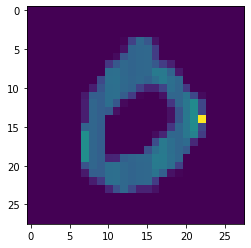

In [46]:
import matplotlib.pyplot as plt

plt.imshow(x_test[3])
plt.show()